# Simple Linear Regression with Tensorflow
We will start by importing the necessary libraries. We will use Numpy along with Tensorflow for computations and Matplotlib for plotting.

Datasource: [Salary_Data.csv](https://drive.google.com/open?id=1-m7kvNCXuxndU1iNvYIM3oaAL3OYv3km)

In [0]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import tensorflow as tf
import seaborn
seaborn.set()

In order to make the random numbers predictable, we will define fixed seeds for both Numpy and Tensorflow.

In [0]:
# Read file from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Assign data tovariable and check the description
data = pd.read_csv('drive/My Drive/dataset/Salary_Data.csv')
describe = data.describe()
print(describe)

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


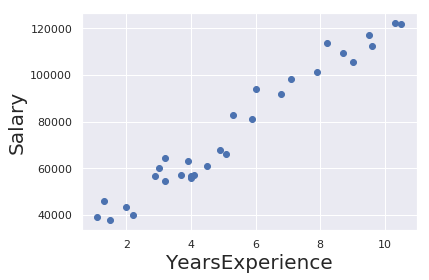

In [0]:
# Define x1, y
y = data['Salary']
x1 = data['YearsExperience']

# Plotting
plt.scatter(x1, y)
plt.xlabel('YearsExperience', fontsize=20)
plt.ylabel('Salary', fontsize=20)
plt.show()

In [0]:
n = len(x1) # Number of data points

#print(x1)
#print(y)

Now we will start creating our model by defining the **placeholders** X and Y, so that we can feed our training examples X and Y into the **optimizer** during the training process.

In [0]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

Now we will declare two trainable Tensorflow **Variables** for the Weights and Bias and initializing them randomly using `np.random.randn()`.

In [0]:
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

In [0]:
"""
print(X)
print(Y)
print(x1)
print(y)
print(W)
print(b)
"""

'\nprint(X)\nprint(Y)\nprint(x1)\nprint(y)\nprint(W)\nprint(b)\n'

Now we will define the hyperparameters of the model, the Learning Rate and the number of Epochs.

In [0]:
learning_rate = 0.01
training_epochs = 10000

Now, we will be building the Hypothesis, the Cost Function and the Optimizer. We won’t be implementing the Gradient Descent Optimizer manually since it is built inside Tensorflow. After that, we will be initializing the Variables.

In [0]:
# Hypothesis of y=(W*X)+b
y_pred = tf.add(tf.multiply(X, W), b)

# Finding Loss using tf.reduce_sum
# Mean Squared Error Cost Function
loss = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Global Variables Initializer
init = tf.global_variables_initializer()

W0828 09:16:40.891565 140183717132160 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Now we will begin the training process inside a Tensorflow Session.

Just try yourself with many Epoch value and examine how Tensoflow build the best model. You can run 3 test as below and then examine the model by visualizing it and compare how the model changes by each case. Below are some test hints:


- **Case 1: Epoch = 100: The best case will be at Epoch 100**
> Training loss = 5.7912707 Weight = 0.99812365 bias = 1.0914398

- **Case 2: Epoch = 1,000: The best case will be at Epoch 1,000**
> Training loss = 5.3110337 Weight = 1.0199214 bias = 0.02561676

- **Case 3: Epoch = 10,000: The best case will be at Epoch 5103 (from this epoch and so on, the values won't change)**
> Training loss = 5.2713084 Weight = 1.0232038 bias = -0.13488421

In [0]:
# Starting the Tensorflow Session
with tf.Session() as sess:
    
    # Initializing the Variables
    sess.run(init)
    
    # Temp value to store previous value of experiment
    temp_val = ""
    
    # Iterating through all the epochs
    for epoch in range(training_epochs):
        
        # Feeding each data point into the optimizer using Feed Dictionary
        for (_x, _y) in zip(x1, y):
            sess.run(optimizer, feed_dict = {X : _x, Y : _y})
        
        # Calculating the loss a every epoch
        c = sess.run(loss, feed_dict = {X : x1, Y : y})
        current_val = "loss=\t" + "{:10.8f}".format(c) \
        + "\tW=\t" + "{:10.8f}".format(sess.run(W)) \
        + "\tb=\t" + "{:10.8f}".format(sess.run(b))
        
        # Keep looping if current experiment has different result from previous
        if temp_val != current_val:
            temp_val = current_val
            
            # Displaying the result after every 100 epochs
            if epoch % 100 == 0:
                print("Epoch=\t" + str(epoch) + "\t" + current_val)

        # Break the loop if it reaches to the best result
        else:
            print("Reached the best model at Epoch", epoch)
            print("Epoch=\t" + str(epoch) + "\t" + current_val)
            break
    
    # Storing necessary values to be used outside the Session
    training_loss = sess.run(loss, feed_dict ={X: x1, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)

Epoch=	0	loss=	1601161088.00000000	W=	3977.41552734	b=	667.31097412
Epoch=	100	loss=	55700324.00000000	W=	12168.33203125	b=	6594.54199219
Epoch=	200	loss=	41784284.00000000	W=	11644.50097656	b=	10284.24804688
Epoch=	300	loss=	32691988.00000000	W=	11220.79101562	b=	13268.70214844
Epoch=	400	loss=	26753232.00000000	W=	10878.06933594	b=	15682.73242188
Epoch=	500	loss=	22875898.00000000	W=	10600.85937500	b=	17635.31054688
Epoch=	600	loss=	20345610.00000000	W=	10376.62597656	b=	19214.70898438
Epoch=	700	loss=	18695442.00000000	W=	10195.25781250	b=	20492.21679688
Epoch=	800	loss=	17620062.00000000	W=	10048.55371094	b=	21525.56445312
Epoch=	900	loss=	16919996.00000000	W=	9929.89746094	b=	22361.33789062
Epoch=	1000	loss=	16464755.00000000	W=	9833.91992188	b=	23037.37109375
Epoch=	1100	loss=	16169161.00000000	W=	9756.28320312	b=	23584.20312500
Epoch=	1200	loss=	15977601.00000000	W=	9693.49023438	b=	24026.51367188
Epoch=	1300	loss=	15853743.00000000	W=	9642.69238281	b=	24384.29882812
Epoch=	1400

Now let's look at the result.

In [0]:
# Calculating the predictions
predictions = weight * x1 + bias
print("Training loss =", training_loss, "Weight =", weight, "bias =", bias, '\n')

Training loss = 15637472.0 Weight = 9427.701 bias = 25898.645 



Note that in this case both the Weight and bias are scalars. This is because, we have considered only one dependent variable in out training data. If we have m dependent variables in our training dataset, the Weight will be an m-dimensional vector while bias will be a scalar.

Finally, we will plot our result.

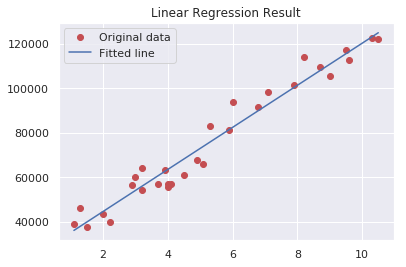

In [0]:
# Plotting the Results
plt.plot(x1, y, 'ro', label ='Original data')
plt.plot(x1, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()